# Download ATL11 data inside a polygon using icepyx

This notebook is tailored for the ICESat-2 HackWeek 2024 project "off-track" (https://github.com/ICESAT-2HackWeek/off_track/) and is a minor modification of the 2024 HackWeek tutorial:  

https://icesat-2-2024.hackweek.io/tutorials/data_access/ICESat2_Data_Access_Tutorial.html

In [8]:
import json
import icepyx as ipx
from shapely.geometry import shape, GeometryCollection

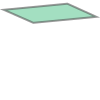

In [9]:
# read GeoJSON file outlining area of interest

with open("/home/jovyan/shared-public/off_track/michael/n_grn_prudhoe_lobe_ll.geojson") as f:
    features = json.load(f)["features"]

grn_divide = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
grn_divide

In [10]:
# use polygon and search parameters to setup an icepyx search query

short_name = 'ATL11'
spatial_extent = list(grn_divide.bounds)
date_range = ['2016-12-01','2024-08-20']
region = ipx.Query(short_name, spatial_extent, date_range)

In [11]:
# display if any data files, or granules, matched the search

region.avail_granules(ids=True)

[['ATL11_005403_0323_006_08.h5',
  'ATL11_011003_0323_006_08.h5',
  'ATL11_017103_0323_006_08.h5',
  'ATL11_034705_0323_006_08.h5',
  'ATL11_040805_0323_006_08.h5',
  'ATL11_055203_0323_006_08.h5',
  'ATL11_061303_0323_006_08.h5',
  'ATL11_067403_0323_006_08.h5',
  'ATL11_078905_0323_006_08.h5',
  'ATL11_085005_0323_006_08.h5',
  'ATL11_105503_0323_006_08.h5',
  'ATL11_111603_0323_006_08.h5',
  'ATL11_123105_0323_006_08.h5',
  'ATL11_129205_0323_006_08.h5',
  'ATL11_135305_0323_006_08.h5']]

In [12]:
# we can also get the S3 URLs

print(region.avail_granules(ids=True, cloud=True))
s3urls = region.avail_granules(ids=True, cloud=True)[1]

[['ATL11_005403_0323_006_08.h5', 'ATL11_011003_0323_006_08.h5', 'ATL11_017103_0323_006_08.h5', 'ATL11_034705_0323_006_08.h5', 'ATL11_040805_0323_006_08.h5', 'ATL11_055203_0323_006_08.h5', 'ATL11_061303_0323_006_08.h5', 'ATL11_067403_0323_006_08.h5', 'ATL11_078905_0323_006_08.h5', 'ATL11_085005_0323_006_08.h5', 'ATL11_105503_0323_006_08.h5', 'ATL11_111603_0323_006_08.h5', 'ATL11_123105_0323_006_08.h5', 'ATL11_129205_0323_006_08.h5', 'ATL11_135305_0323_006_08.h5'], ['s3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_005403_0323_006_08.h5', 's3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_011003_0323_006_08.h5', 's3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_017103_0323_006_08.h5', 's3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_034705_0323_006_08.h5', 's3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_040805_0323_006_08.h5', 's3://nsidc-cumulus-prod-protected/ATLAS/ATL11/006/2019/03/29/ATL11_055

In [13]:
# download the granules into a folder on CryoCloud

region.download_granules('/home/jovyan/shared-public/off_track/michael/ATL11/n_grn')

Total number of data order requests is  1  for  15  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000005736715
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
NSIDC returned these messages
['Granule 307884311 contained no data within the spatial and/or temporal '
 'subset constraints to be processed']
Beginning download of zipped output...
Data request 5000005736715 of  1  order(s) is downloaded.
Download complete
